# Library Definition

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
df = pd.read_csv("C:/Users/ismai/Documents/DataScience/learnbay/ML Models/LinearRegression/petrol_consumption.csv")


In [3]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
print("Shape of dataframe: ", df.shape)
print(f'Shape of dataframe: {df.shape}')

Shape of dataframe:  (48, 5)
Shape of dataframe: (48, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


# Exploratory Data Analysis

In [6]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [7]:
#Correlation chat
df.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


<AxesSubplot:>

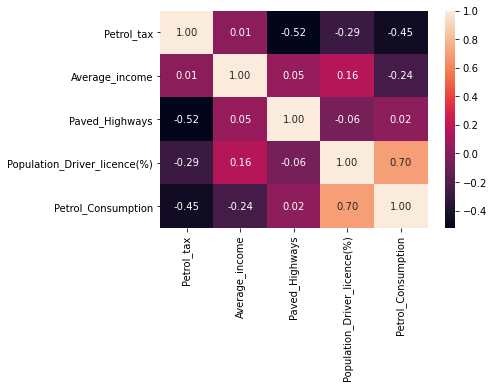

In [8]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

C:\Users\ismai\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Petrol_tax', ylabel='Density'>

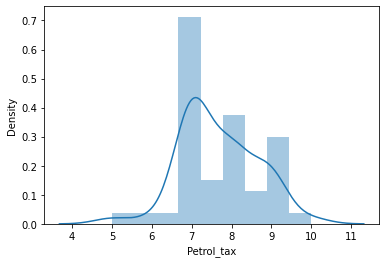

In [9]:
sns.distplot(df.loc[:, 'Petrol_tax'],hist=True)

C:\Users\ismai\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Petrol_tax'>

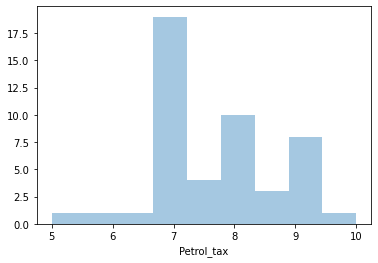

In [10]:
sns.distplot(df.loc[:, 'Petrol_tax'],kde=False)

In [11]:
df.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

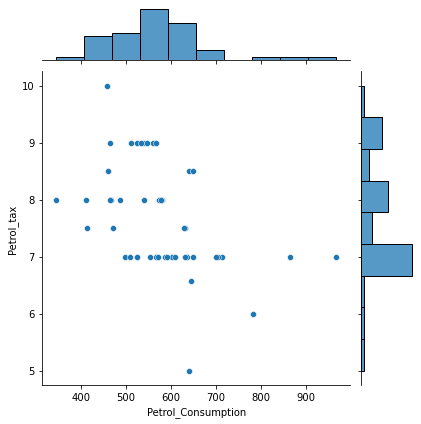

In [12]:
#Bivariate Analysis
sns.jointplot(x='Petrol_Consumption', y = 'Petrol_tax', data=df)



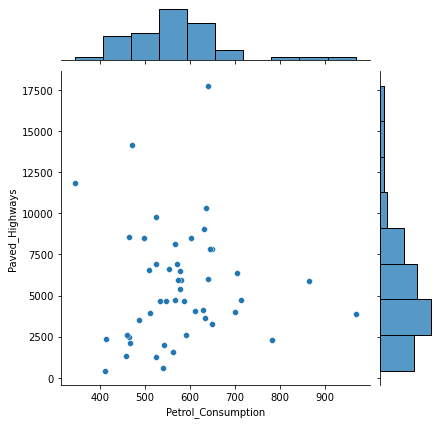

In [13]:
sns.jointplot(x='Petrol_Consumption', y = 'Paved_Highways', data=df)

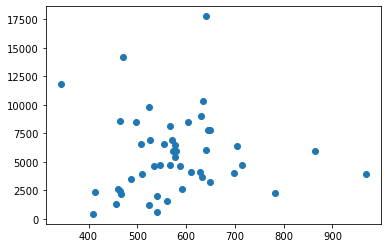

In [14]:
plt.scatter(x='Petrol_Consumption', y = 'Paved_Highways', data=df)

# Model build

In [15]:
X = df.iloc[:, 0:df.shape[1]-1]  #Selection X features
y = df['Petrol_Consumption']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state = 786)

In [17]:
print("Training dataset shape : ", X_train.shape, y_train.shape)
print("Testing dataset shape : ", X_test.shape, y_test.shape)


Training dataset shape :  (38, 4) (38,)
Testing dataset shape :  (10, 4) (10,)


In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [19]:
print(regressor.coef_)
print(regressor.intercept_)

[-3.43890001e+01 -6.82469623e-02 -2.36112918e-03  1.41901233e+03]
335.72047070616543


In [20]:
pd.DataFrame( regressor.coef_, X.columns, columns = ['Coefficient'])

,Coefficient
Petrol_tax,-34.389000
Average_income,-0.068247
Paved_Highways,-0.002361
Population_Driver_licence(%),1419.012331


### Prediction & Analysis on error Term using training data

In [21]:
#Prediction on training dataset
y_pred = regressor.predict(X_train)
y_pred

array([579.91438473, 565.7079901 , 590.1639649 , 506.94436141,
       555.67654197, 721.61952896, 648.89188817, 573.35788035,
       487.52034675, 642.84667373, 533.00931209, 668.71517581,
       490.54677203, 439.45553654, 469.05598707, 599.53731296,
       521.69453637, 728.41110051, 490.44026608, 434.36385292,
       656.353145  , 559.58638737, 648.61726326, 581.72736166,
       531.31514419, 634.98141851, 596.36558763, 786.54364453,
       522.82544996, 411.34699122, 571.97557782, 676.21271187,
       703.84726178, 742.82049595, 554.10595212, 498.98984774,
       458.18902815, 565.32331779])

In [22]:
#Actual Vs Predicted on training dataset
df_train = pd.DataFrame({'Actual': y_train,'Predict': y_pred})
df_train.head()

,Actual,Predict
31,554,579.914385
13,508,565.707990
26,577,590.163965
24,460,506.944361
1,524,555.676542


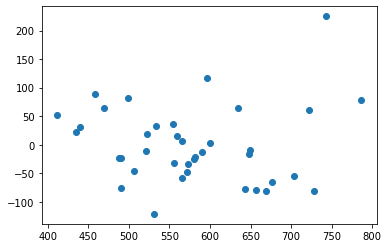

In [23]:
#Validating OLS - Ordinary Least Square Assumption
plt.scatter(y_pred, (y_train - y_pred))  #prediction dataframe & error term

In [24]:
#Checking mean of error term
(y_train - y_pred).mean()

-2.542995054299306e-14

C:\Users\ismai\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Petrol_Consumption', ylabel='Density'>

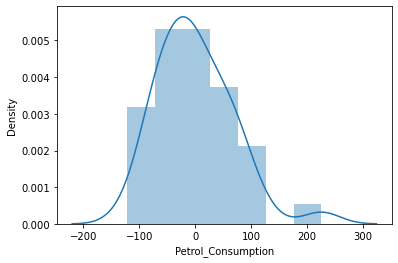

In [25]:
#Distribuution of error term
sns.distplot((y_train-y_pred), kde=True)

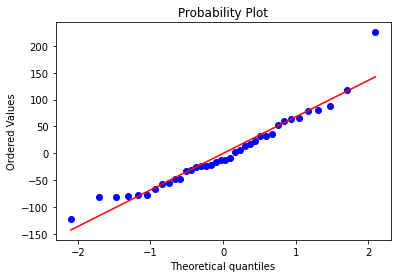

In [26]:
from scipy import stats
stats.probplot((y_train-y_pred),plot=plt,)
plt.show()

### Statistical models

In [27]:
import statsmodels.api as sm

In [28]:
res = sm.OLS(y_train,X_train)
res.fit()

In [29]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Petrol_Consumption   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              607.9
Date:                Wed, 03 Nov 2021   Prob (F-statistic):                    4.19e-31
Time:                        21:24:56   Log-Likelihood:                         -214.88
No. Observations:                  38   AIC:                                      437.8
Df Residuals:                      34   BIC:                                      444.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Petrol_tax                     -16.7749      9.395     -1.785      0.083     -35.869       2.319
Average_income                  -0.0624      0.022     -2.901      0.006      -0.106      -0.019
Paved_Highways                   0.0009      0.003      0.269      0.789      -0.006       0.008
Population_Driver_licence(%)  1693.7337    168.719     10.039      0.000    1350.855    2036.612
==============================================================================
Omnibus:                        6.519   Durbin-Watson:                   1.469
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                5.106
Skew:                           0.812   Prob(JB):                       0.0779
Kurtosis:                       3.765   Cond. No.                     1.02e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Evaluation using Testing data

In [30]:
#Using SKLEARN Model
y_pred1 = regressor.predict(X_test)

print(f'MAE = {mean_absolute_error(y_test, y_pred1)}')
print(f'MSE = {mean_squared_error(y_test, y_pred1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred1))}')

MAE = 38.977982672376534
MSE = 1958.2760130254003
RMSE = 44.25241251079313


In [31]:
y_pred2 = res.fit().predict(X_test)
print(f'MAE = {mean_absolute_error(y_test, y_pred2)}')
print(f'MAE = {mean_squared_error(y_test, y_pred2)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred2))}')

MAE = 43.61196236327423
MAE = 2703.485042530197
RMSE = 51.995048250099714


In [32]:
def mean_abs_percent_error(test, pred):    
    return print('Mean Absolute Percentage Error: ',  round(np.mean(np.abs((test - pred ) / test)) * 100, 4))

In [33]:
mean_abs_percent_error(y_test, y_pred1)
mean_abs_percent_error(y_test, y_pred2)

Mean Absolute Percentage Error:  6.9178
Mean Absolute Percentage Error:  7.5899


# Saving model

In [43]:
regressor.predict([[6.58,3802,7834,0.6290]])

array([724.02756974])

In [44]:
res.fit().predict([[6.58,3802,7834,0.6290]])

array([725.11288679])

In [46]:
import joblib
joblib.dump(regressor, 'lr_model.pkl')

['lr_model.pkl']

In [48]:
import joblib
joblib.dump(res.fit(), 'lr_statsmodel.pkl')

['lr_statsmodel.pkl']

In [49]:
model1 = joblib.load('lr_model.pkl')
model2 = joblib.load('lr_statsmodel.pkl')

In [50]:
model1.predict([[6.58,3802,7834,0.6290]])

array([724.02756974])

In [51]:
model2.predict([[6.58,3802,7834,0.6290]])

array([725.11288679])